In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5
sns.set_style('darkgrid')

In [3]:
adult_df = pd.read_csv('adult.csv')
adult_df.columns = ['age', 'workclass', 'fnlwgt','education','education_num', 'marital_status', 'occupation','relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# seperating categorical and numerical variables 
categoricals = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']
numericals = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

In [6]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [7]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


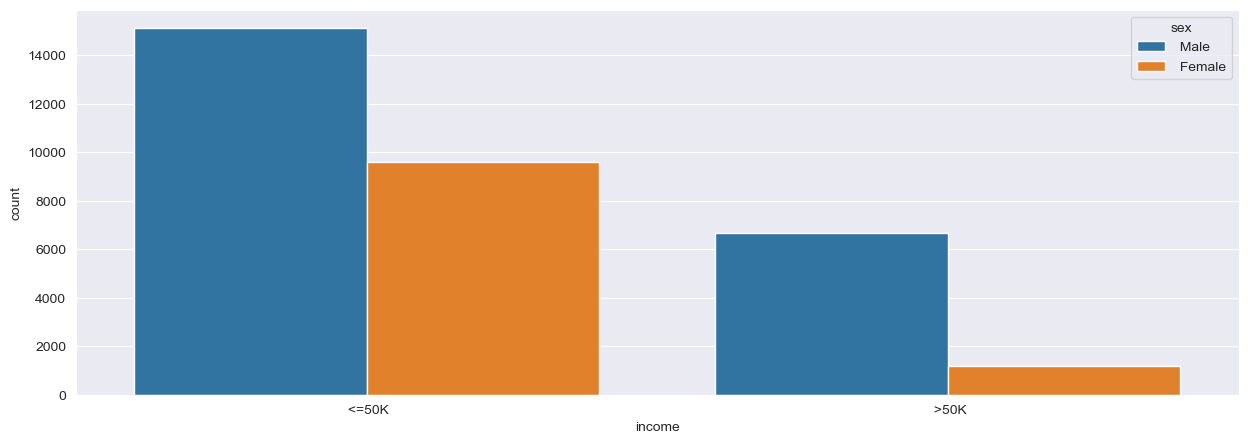

In [8]:
# is there gender based income gap
sns.countplot(x=adult_df['income'], hue='sex', data= adult_df)
plt.show()

<Axes: xlabel='sex'>

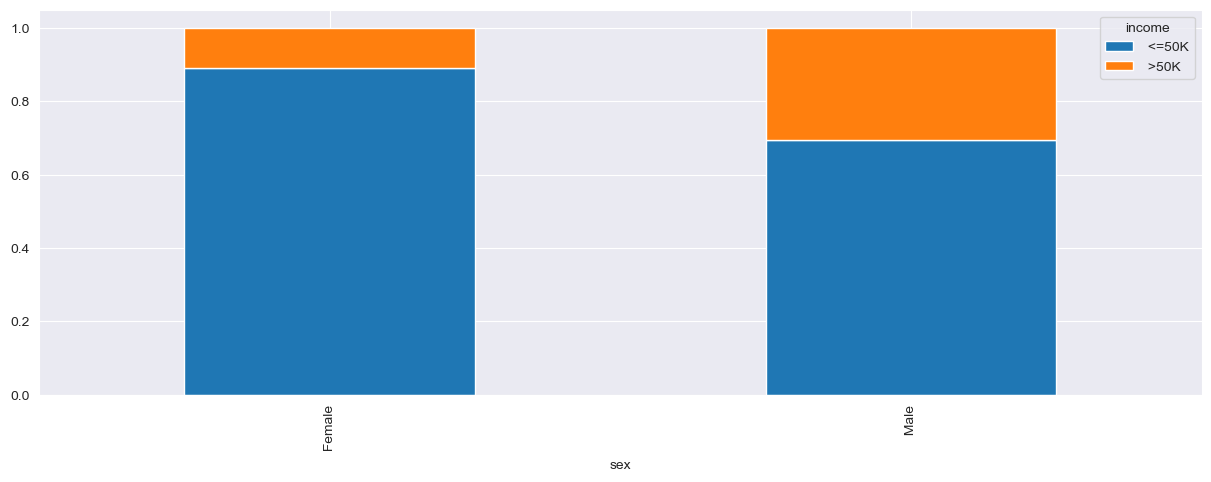

In [9]:
# another way to see the difference in count, use stackd bar chart
table = pd.crosstab(adult_df.sex, adult_df.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind ='bar',stacked=True)

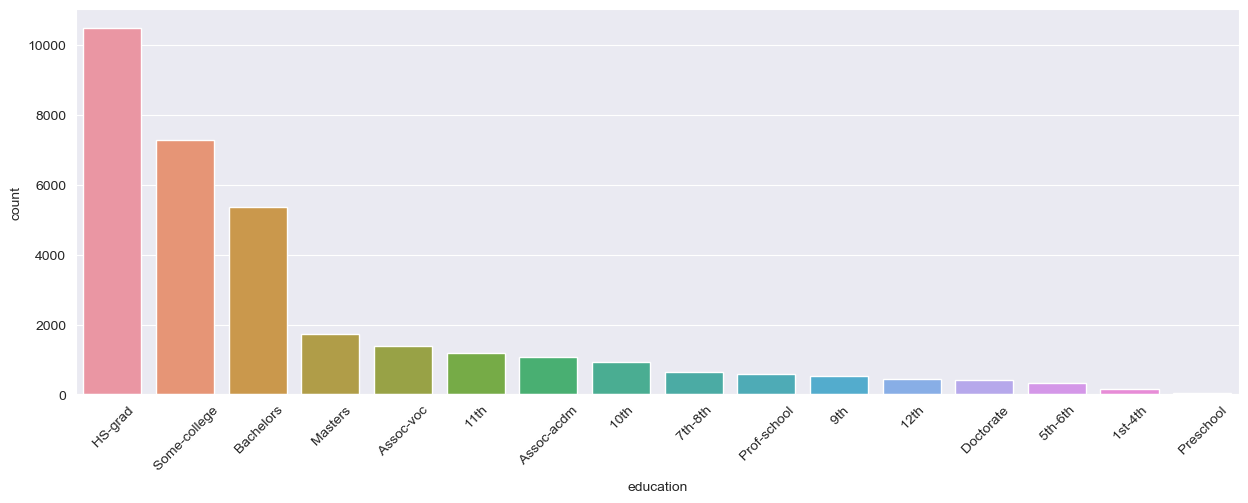

In [10]:
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

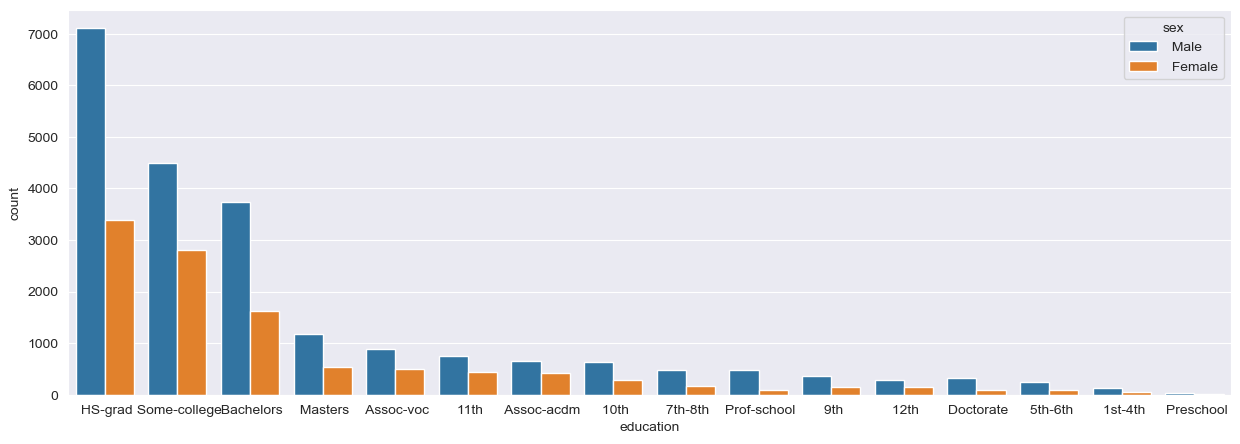

In [11]:
# plot education distrubition by gender
sns.countplot(x=adult_df['education'], hue='sex', order=adult_df['education'].value_counts().index, data=adult_df)
plt.show()

<Axes: xlabel='sex'>

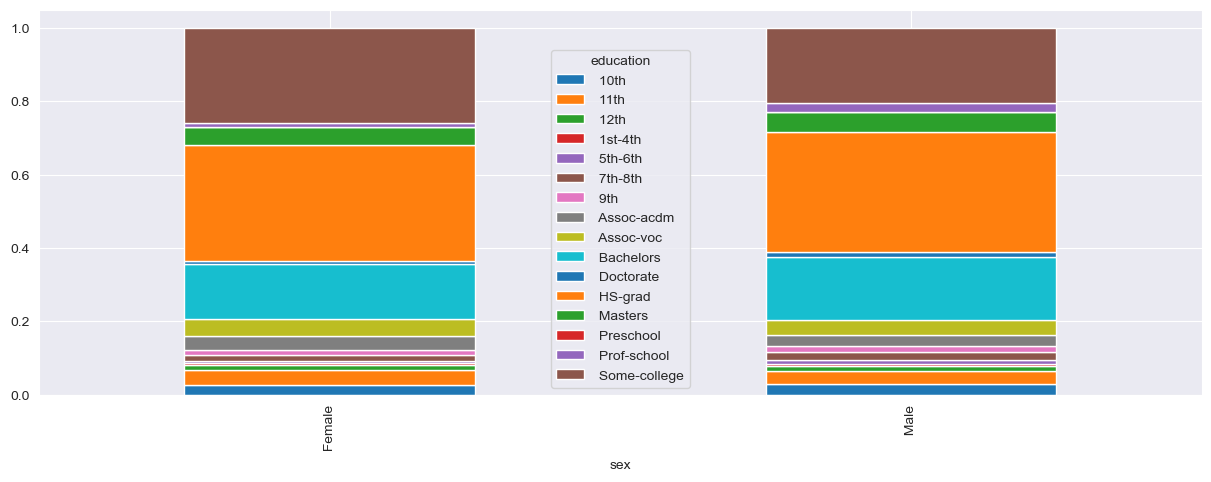

In [12]:
# try to see any difference using a stacked bar chart for eduction levels by gender
table = pd.crosstab(adult_df.sex, adult_df.education)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# The education of both genders are similar

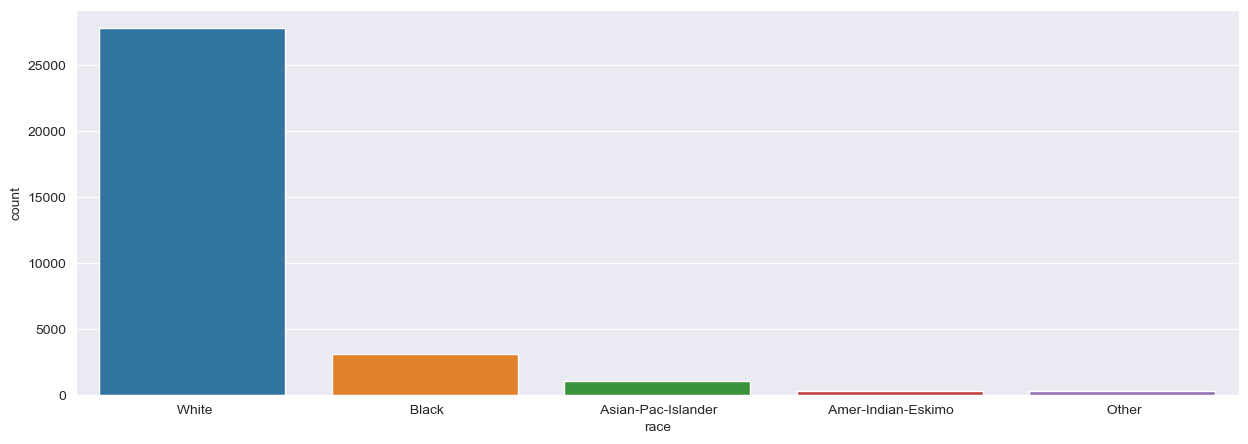

In [13]:
# this graph is for each race
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

<Axes: xlabel='race'>

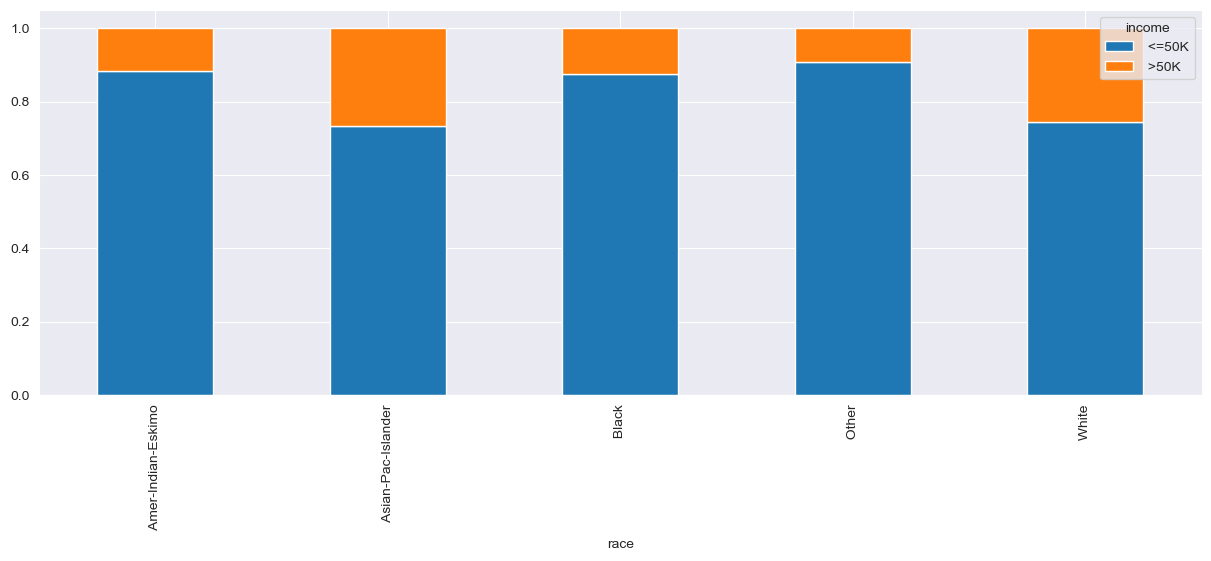

In [14]:
# plot income by race
table = pd.crosstab(adult_df.race, adult_df.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# Asian-Pacific Islander and white have more difference in earning over 50K than other groups

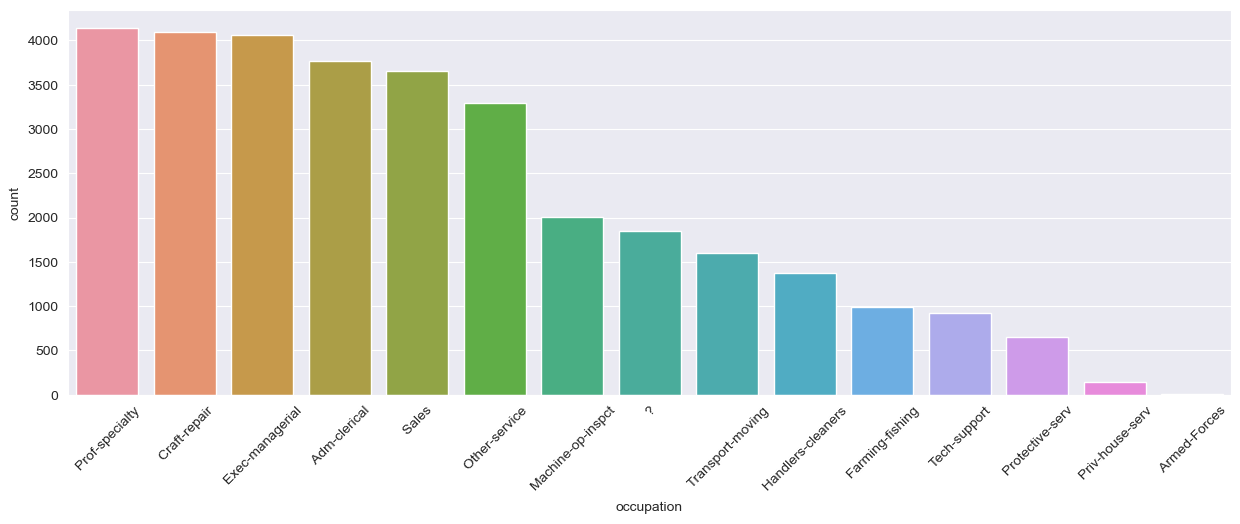

In [15]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [20]:
# ? is missing vlaues
adult_df['workclass'] = adult_df['workclass'].replace('?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace('?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace('?', np.NaN)

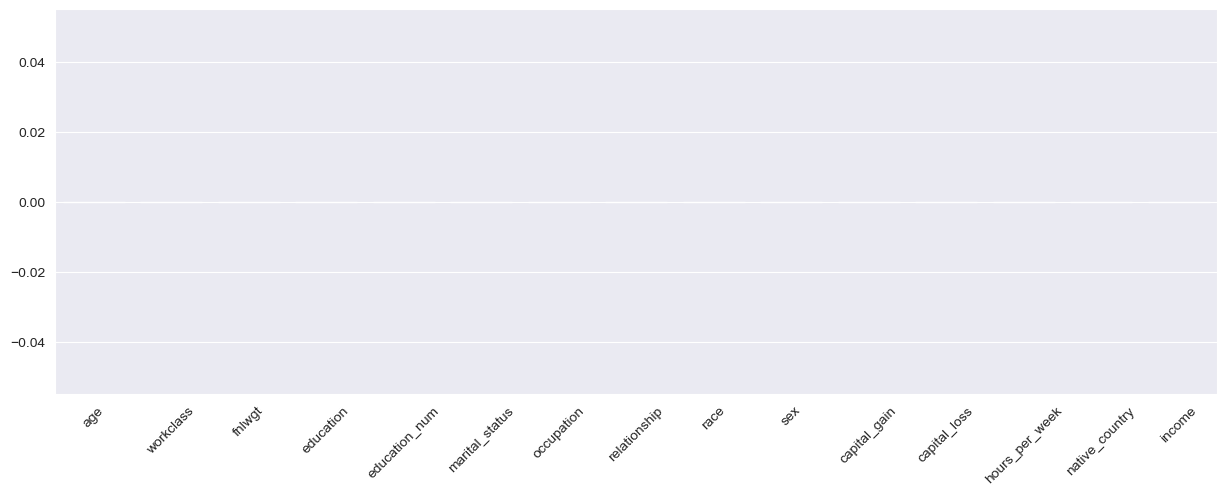

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [21]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()
print(adult_df.isnull().sum())  # Check if missing values exist


In [22]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [23]:
adult_df[numericals].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')
#we can also check for '?' values, if no output, there are none

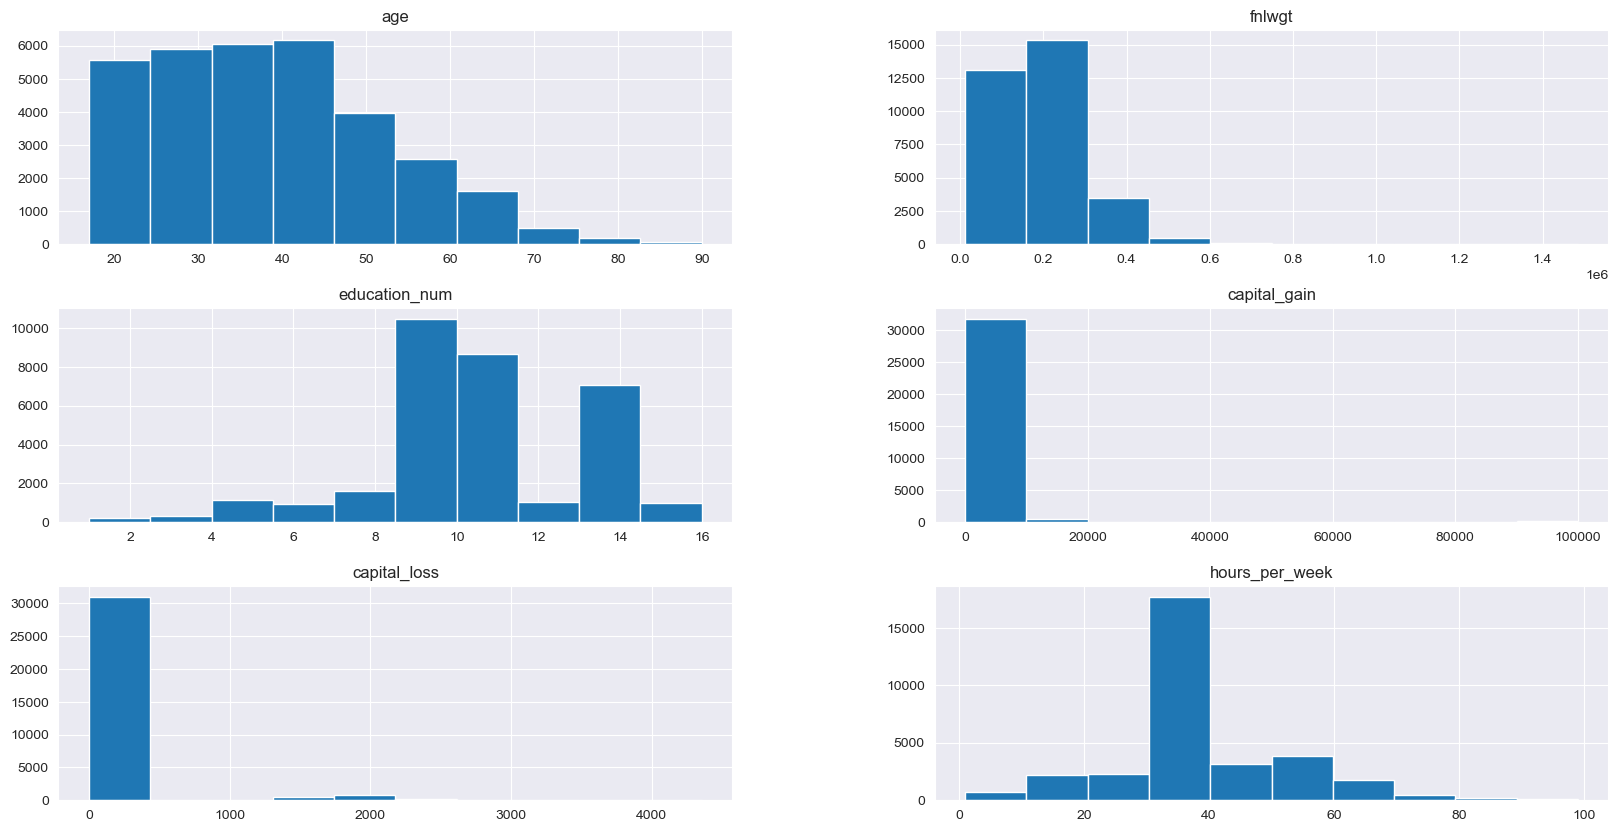

In [25]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

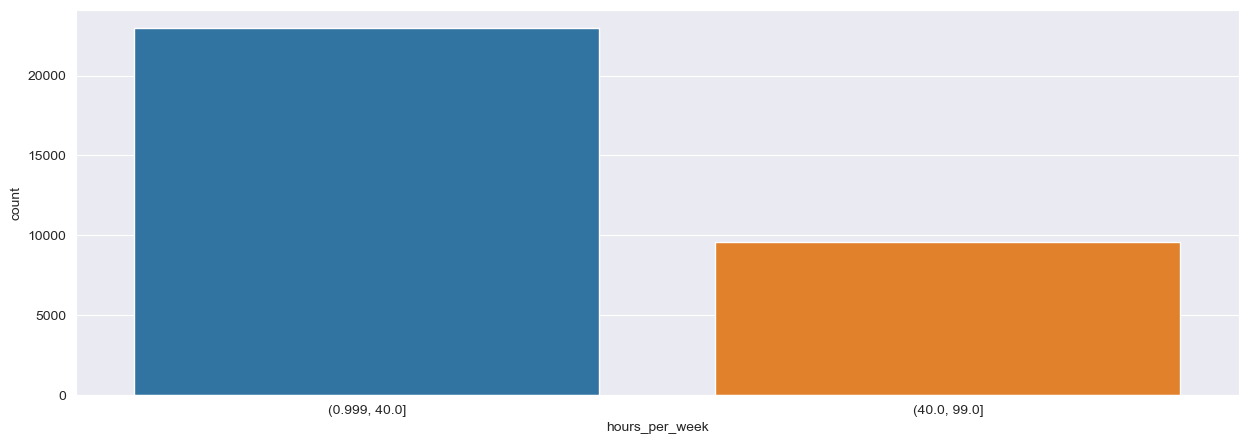

In [26]:
#lets bin the number of hours worked and then plot against salary
temp = pd.qcut(x = adult_df['hours_per_week'],q=2)

sns.countplot(x=temp)
plt.show()
#this shows that most people work less than 40 hours a week

<Axes: xlabel='hours_per_week'>

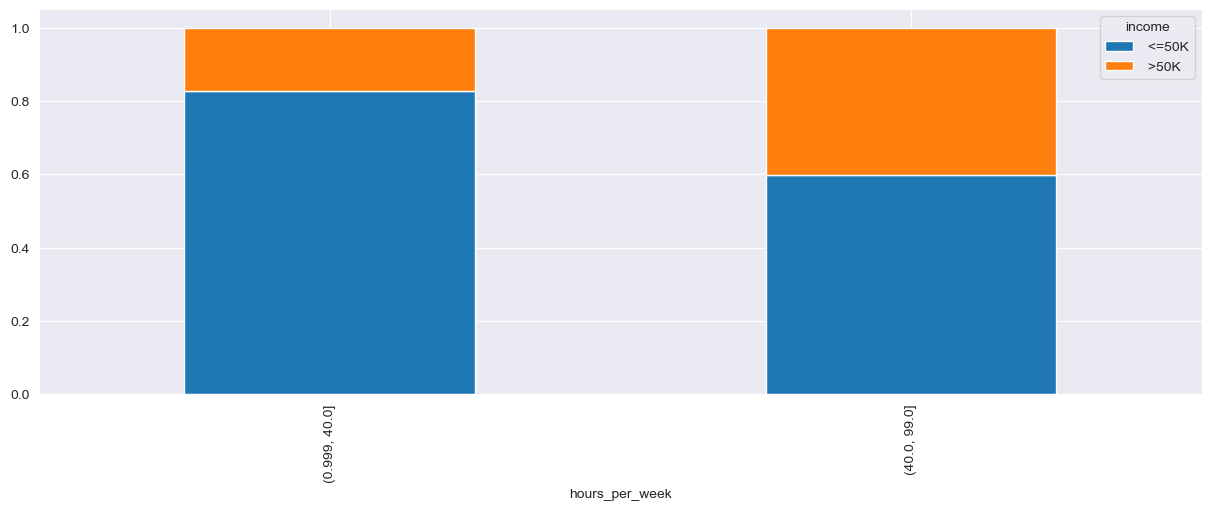

In [27]:
#show income by amount of hours worked
table=pd.crosstab(temp, adult_df.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
#those who work more than 40 hours a week are more likely to earn more 

In [28]:
# preprocessing
#replace null values with mode
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

In [29]:
#use get dummies/one hot encoding as these are not ordinal
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)

In [30]:
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [31]:
#now scale data
from sklearn.preprocessing import RobustScaler

# all columns except our target column for X
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])
# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled

In [32]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.65,-0.797262,1.000000,0.0,0.0,-5.4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.05,0.312717,-0.333333,0.0,0.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.80,0.472711,-1.000000,0.0,0.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,-0.45,1.342409,1.000000,0.0,0.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.00,0.890927,1.333333,0.0,0.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [33]:
X.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.079082,0.095777,0.026863,1077.615172,87.306511,0.087494
std,0.682032,0.885314,0.857570,7385.402999,402.966116,2.469524
min,-1.000000,-1.393003,-3.000000,0.000000,0.000000,-7.800000
25%,-0.450000,-0.507717,-0.333333,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.550000,0.492283,0.666667,0.000000,0.000000,1.000000
max,2.650000,10.957131,2.000000,99999.000000,4356.000000,11.800000


In [34]:
#creating our model
#split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#fit/train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
#evaluate the model
#first, predict from test data
y_pred = gnb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

#then compare prediction to actual values and get score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8235


In [38]:
#now compare training set and testing set accuracy
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
#comparable values mean no overfitting

Training set score: 0.8246
Test set score: 0.8235


In [39]:
#visualize results with confusion matrix and classification report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6360 1071]
 [ 653 1684]]

True Positives(TP) =  6360

True Negatives(TN) =  1684

False Positives(FP) =  1071

False Negatives(FN) =  653


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.86      0.88      7431
        True       0.61      0.72      0.66      2337

    accuracy                           0.82      9768
   macro avg       0.76      0.79      0.77      9768
weighted avg       0.84      0.82      0.83      9768



In [41]:
#finally, perform k-fold cross validation
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.83508772 0.80570175 0.83984204 0.81044318 0.82799473 0.81395349
 0.82799473 0.84291356 0.82185169 0.81790259]

Average cross-validation score: 0.8244


In [42]:
###Now with Different Dataset###
iris_df = pd.read_csv('Iris_data.csv.xls')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris_df.info()
#150 entries, 5 attributes
#4 attributes are floats, 1 is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#change species data to numerical using one hot encoding
#b/c not ordinal
iris_df = pd.get_dummies(data=iris_df, columns=['species'], drop_first=True)

In [46]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [47]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sepal_length             150 non-null    float64
 1   sepal_width              150 non-null    float64
 2   petal_length             150 non-null    float64
 3   petal_width              150 non-null    float64
 4   species_Iris-versicolor  150 non-null    bool   
 5   species_Iris-virginica   150 non-null    bool   
dtypes: bool(2), float64(4)
memory usage: 5.1 KB


In [48]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


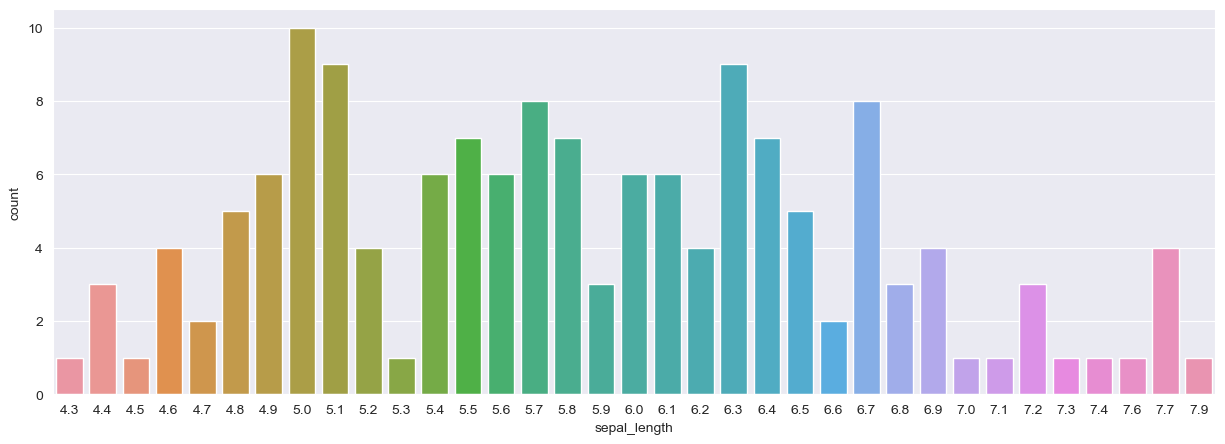

In [49]:
sns.countplot(x=iris_df['sepal_length'])
plt.show()

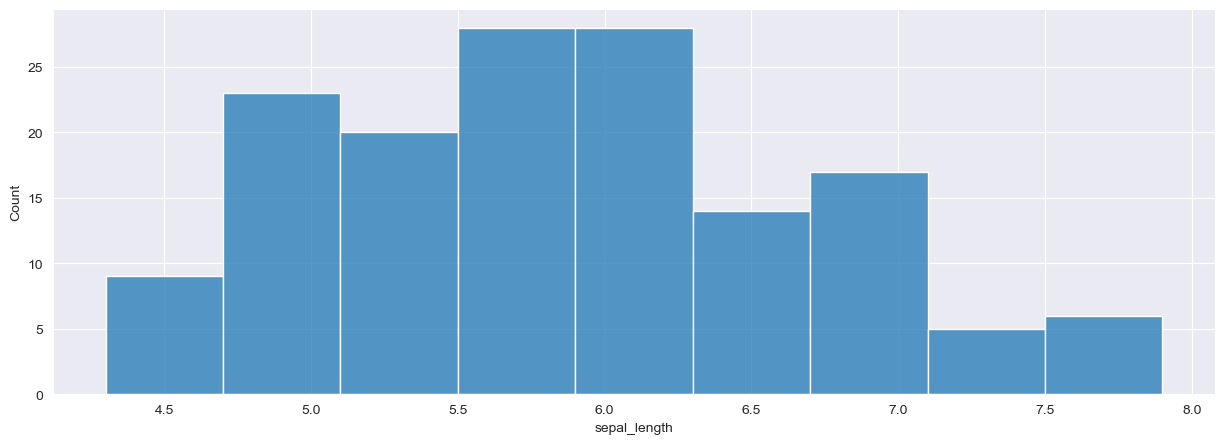

In [50]:
sns.histplot(x=iris_df['sepal_length'])
plt.show()

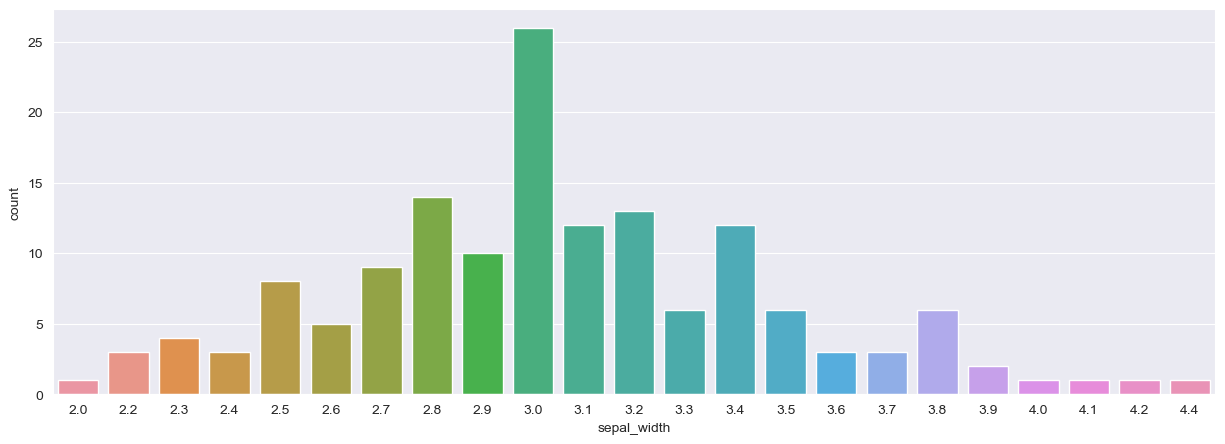

In [51]:
sns.countplot(x=iris_df['sepal_width'])
plt.show()

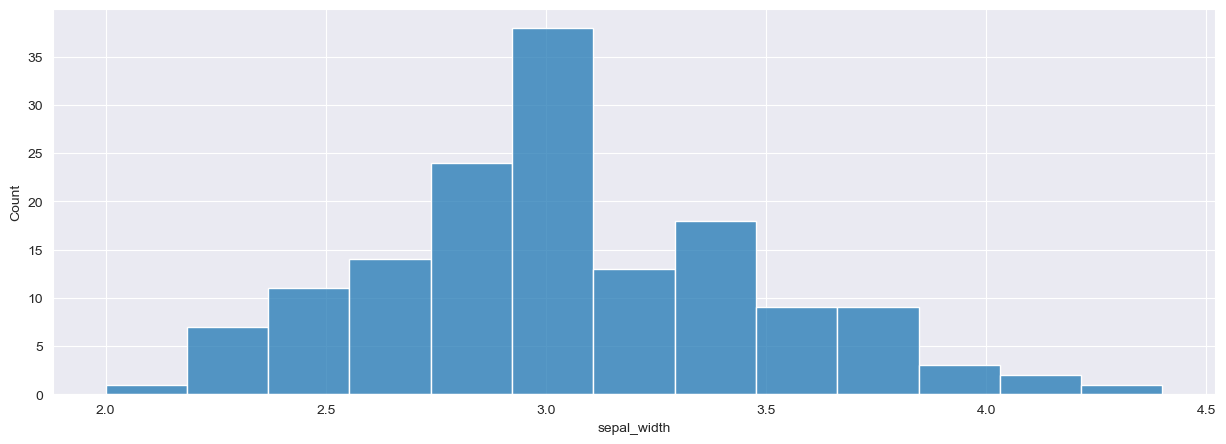

In [52]:
sns.histplot(x=iris_df['sepal_width'])
plt.show()

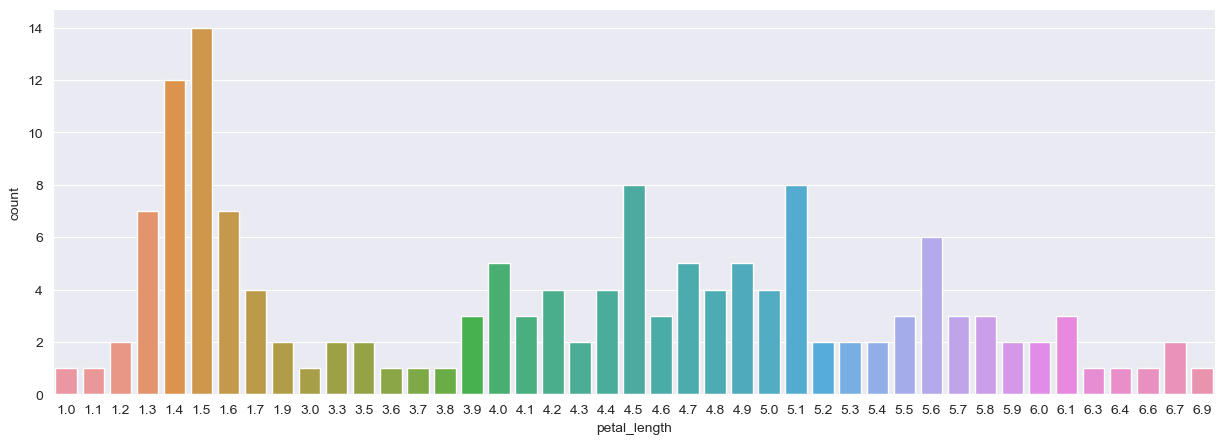

In [53]:
sns.countplot(x=iris_df['petal_length'])
plt.show()

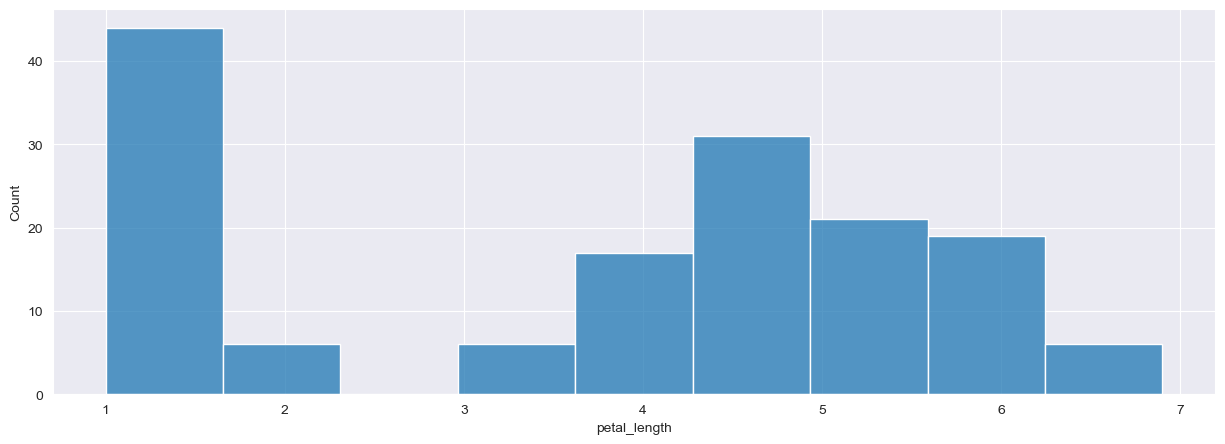

In [54]:
sns.histplot(x=iris_df['petal_length'])
plt.show()

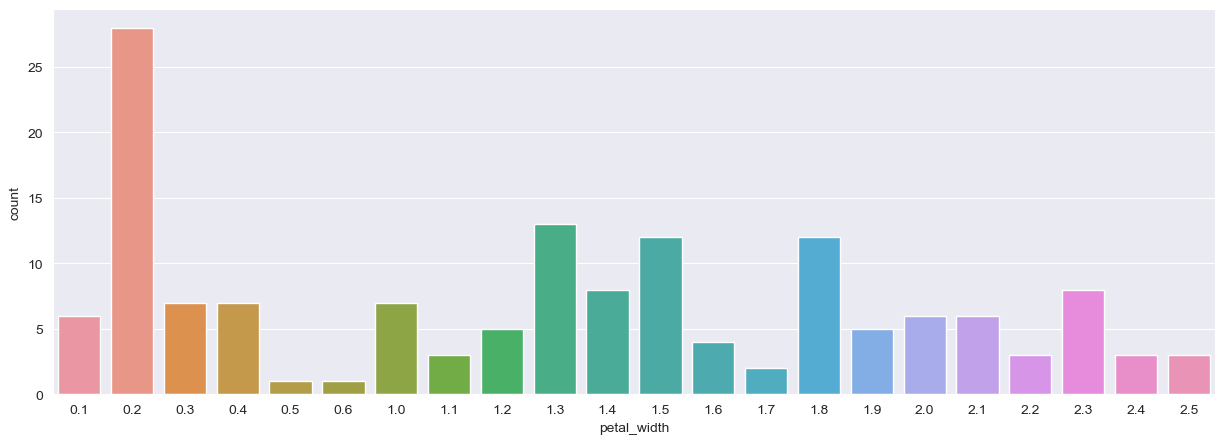

In [55]:
sns.countplot(x=iris_df['petal_width'])
plt.show()

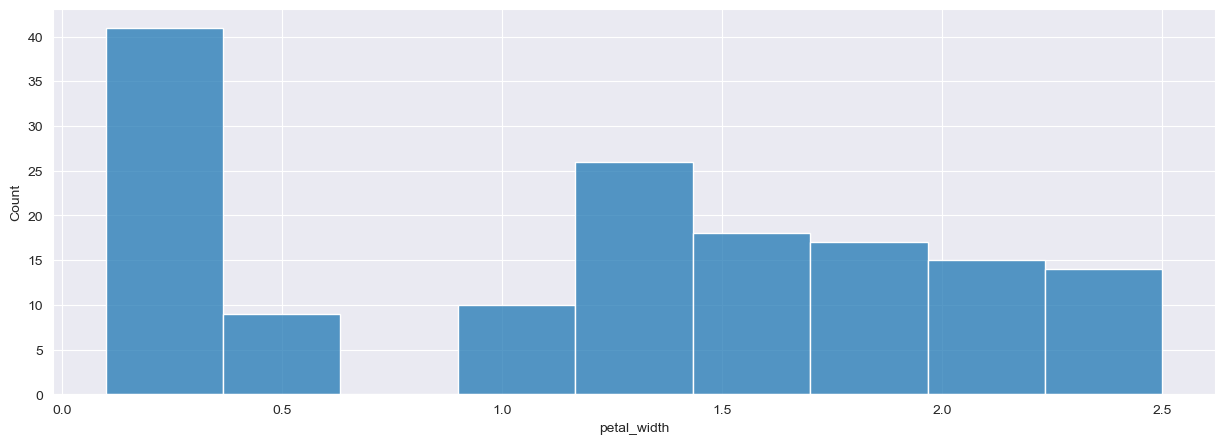

In [56]:
sns.histplot(x=iris_df['petal_width'])
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\svemi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


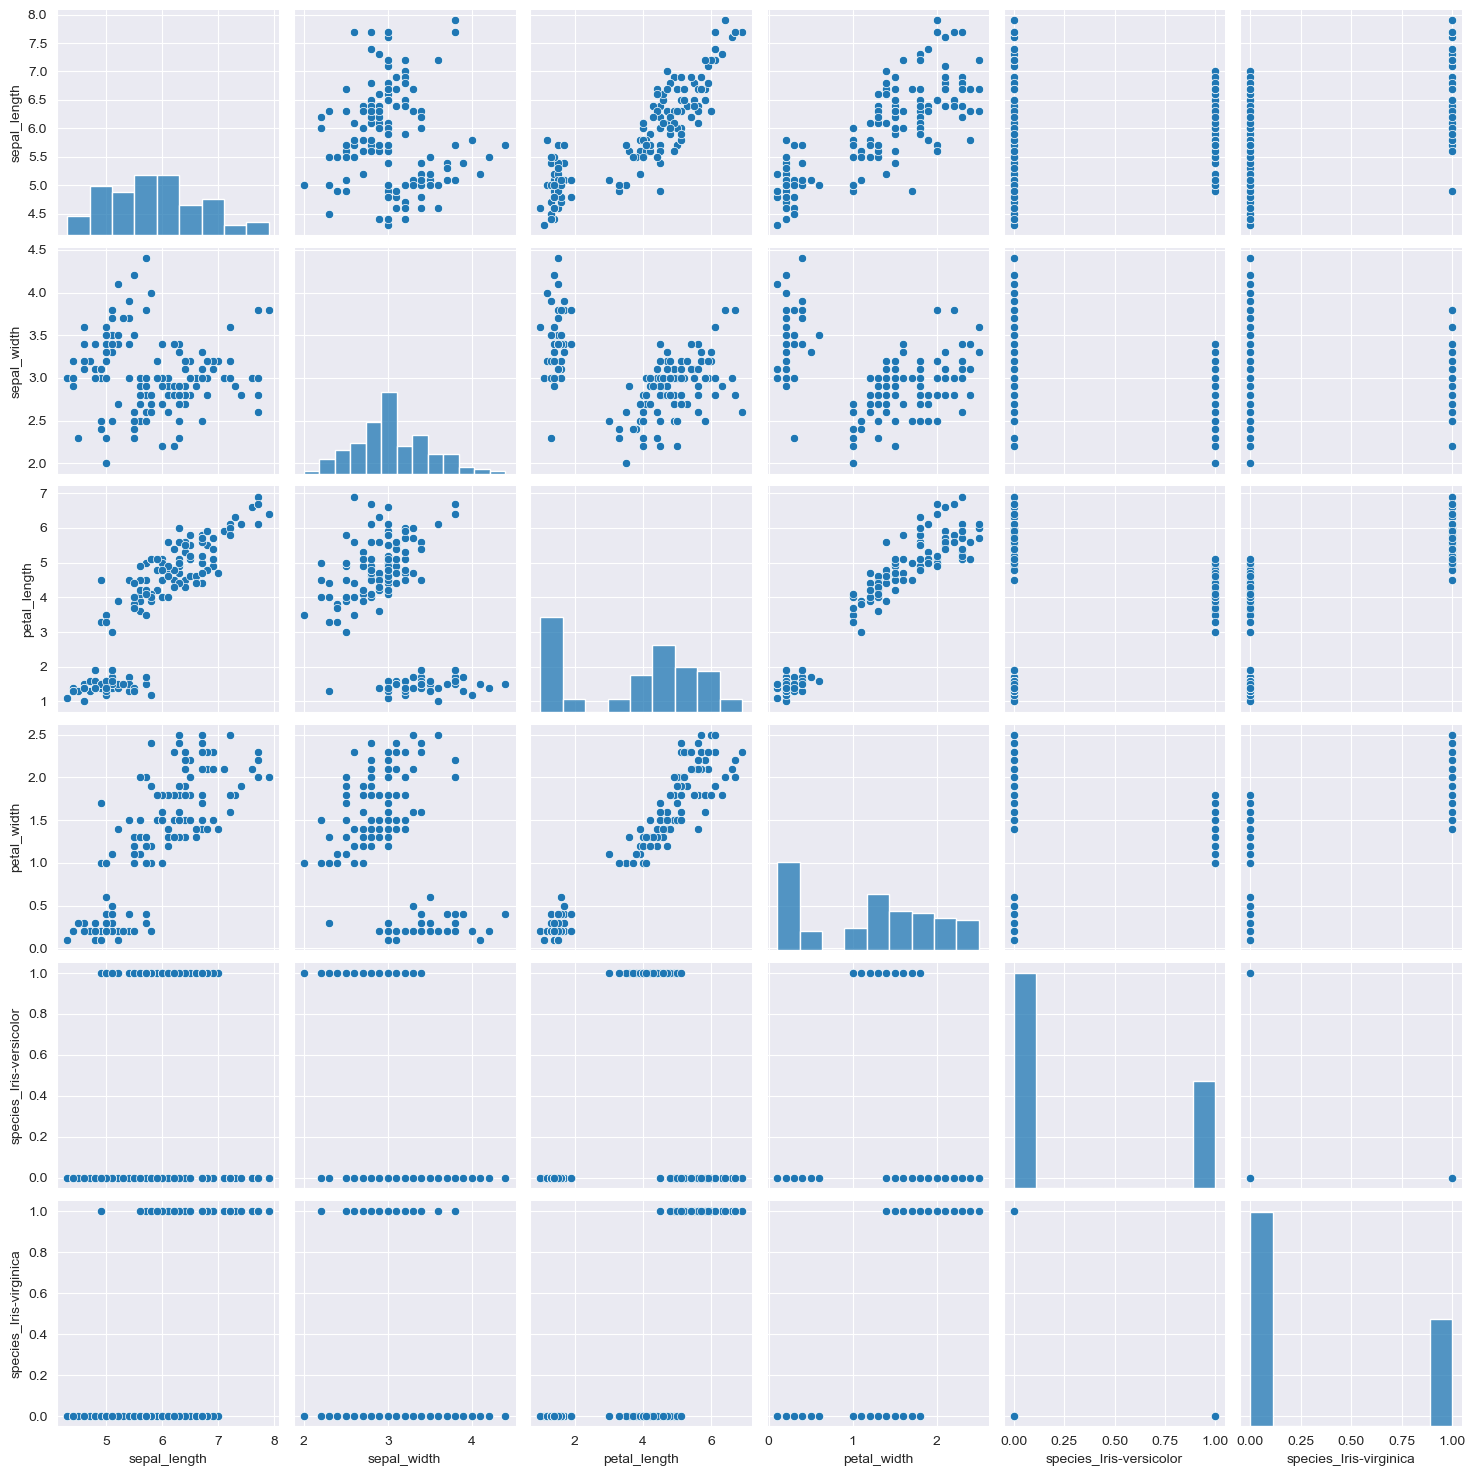

In [57]:
sns.pairplot(iris_df)
#correlations between petal length and width as well as petal length and species, etc.

In [58]:
#preprocessing
#scale data

# all columns except our target column for X
X = iris_df.drop('species_Iris-versicolor', axis=1)
X = X.drop('species_Iris-virginica', axis=1)
y = iris_df['species_Iris-versicolor']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.

X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [59]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


In [60]:
# model create
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [62]:
#evaluate model
y_pred = gnb.predict(X_test)

In [63]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
#high accuracy

Model accuracy score: 1.0000


In [64]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
#training and testing scores are similar, no overfitting

Training set score: 0.8857
Test set score: 1.0000


In [65]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[31  0]
 [ 0 14]]

True Positives(TP) =  31

True Negatives(TN) =  14

False Positives(FP) =  0

False Negatives(FN) =  0


In [66]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        31
        True       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [67]:
#cross validation
#10 fold
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

#find average score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.81818182 0.90909091 0.90909091 0.90909091 0.81818182 0.7
 0.8        0.9        0.9        1.        ]

Average cross-validation score: 0.8664


In [68]:
#model about 92% accurate on average